# 3.5.1 상수 텐서와 변수
텐서플로에서 어떤 작업을 하려면 텐서가 필요합니다.
텐서를 만들려면 초깃값이 필요합니다.
예를 들어 모두 1이거나 0인 텐서를 만들거나(3-1), 랜덤한 분포에서 뽑은 값으로 텐서를 만들 수 있습니다.(3-2)

In [1]:
# 3-1 모두 1 또는 0인 텐서

import tensorflow as tf
x = tf.ones(shape=(2, 1)) # np.ones(shape=(2,1))과 동일
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [2]:
x = tf.zeros(shape=(2, 1)) # np.zeros(shape=(2,1))과 동일
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


In [3]:
# 3-2 랜덤 텐서 

x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.) 
# 평균이 0이고 표준편차가 1인 정규분포에서 뽑은 랜덤한 값으로 만든 텐서. np.random.normal(shape=(3,1), loc=0., scale=1.)과 동일 
print(x)

tf.Tensor(
[[-0.4506952 ]
 [ 0.75043356]
 [ 0.2711579 ]], shape=(3, 1), dtype=float32)


In [4]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.) 
# 0과 1 사이의 균등분포에서 뽑은 랜덤한 값으로 만든 텐서. np.random.uniform(shape=(3,1), low=0., high=1.)과 동일 
print(x)

tf.Tensor(
[[0.769464  ]
 [0.8335464 ]
 [0.33089638]], shape=(3, 1), dtype=float32)


넘파이 배열과 텐서플로 텐서 사이의 큰 차이점은 텐서플로 텐서에는 값을 할당할 수 없다는 것이다.
즉 텐서플로 텐서는 상수이다.

In [5]:
# 3-3 넘파이 배열에 값 할당하기
import numpy as np

x = np.ones(shape=(2, 2))
x[0, 0] = 0.

텐서플로에서 같은 작업을 하면 에러가 발생한다.

In [6]:
# 3-4 텐서플로 텐서에 값을 할당하지 못함

x = tf.ones(shape=(2, 2))
x[0, 0] = 0.

TypeError: 'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment

tf.Variable은 텐서플로에서 수정 가능한 상태를 관리하기 위한 클래스다.
변수를 만들려면 랜덤 텐서와 같이 초깃값을 제공해야 한다.

In [7]:
# 3-5 텐서플로 변수 만들기

v = tf.Variable(initial_value = tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[0.89406455],
       [1.079386  ],
       [0.22194304]], dtype=float32)>


 변수의 상태는 assign 메서드로 수정할 수 있다.

In [8]:
# 3-6 텐서플로 변수에 값 할당하기

v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

변수의 일부 원소에만 적용할 수도 있다.

In [9]:
# 3-7 변수 일부에 값 할당하기
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

비슷하기 assign_add()와 assign_sub()은 각각 +=, -=과 동일하다.

In [10]:
# assign_add() 사용하기

v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

# 3.5.2 텐서 연산: 텐서플로에서 수학 계산하기

In [11]:
# 3-9 기본적인 수학 연산
a = tf.ones((2, 2))
b = tf.square(a) # 제곱 계산
c = tf.sqrt(a) # 제곱근 계산
d = b + c
e = tf.matmul(a, b) # 두 텐서의 점곱 계산
e *= d

print(a, b, c, d, e)

tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[1. 1.]
 [1. 1.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32) tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)


# 3.5.3 GradientTape API 다시 살펴보기
미분 가능한 표현이라면 어떤 입력에 대해서도 그레디언트를 계산할 수 있다.
GradientTape 블록을 시작하고 하나 또는 여러 입력 텐서에 대해 계산을 수행한 후에 입력에 대해 결과의 기울기를 구하면 된다.

In [12]:
# 3-10 GradientTape 사용하기

input_var = tf.Variable(initial_value = 3.)
with tf.GradientTape() as tape:
    result = tf.square(input_var)
gradient = tape.gradient(result, input_var)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


실제로 입력은 어떤 탠서라도 가능하다. 
하지만 텐서플로는 기본적으로 훈련 가능한 변수만 추적한다.
셍수 텐서의 경우 tape.watch()를 호출하여 추적한다는 것을 수동으러 알려주어야 한다.

In [13]:
# 3-11 상수 텐서 입력과 함께 GradientTape 사용하기

input_const = tf.constant(3.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result = tf.square(input_const)
gradient = tape.gradient(result, input_const)
print(gradient)

tf.Tensor(6.0, shape=(), dtype=float32)


그레이디언트 테이프는 강력한 유틸리티이다. 그레이디언트의 기울기도 계산할 수 있다.

In [14]:
# 3-12 그레이디언트 테이프를 중첩하여 이계도 그레이디언트 계산하기

time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position = 4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)
print(acceleration)

tf.Tensor(9.8, shape=(), dtype=float32)


# 3.5.4 End-to-End 예제: 텐서플로 선형 분류기

In [15]:
# 3-13 2D 평면에 두 클래스의 랜덤한 포인트 생성하기

num_samples_per_class = 1000
# 첫번째 클래스의 포인트를 생성합니다: 1000개의 랜덤한 2D 포인트, 
# cov=[[1, 0.5], [0.5, 1]]은 왼쪽 아래에서 오른쪽 위로 향하는 태원형의 포인트 클라우드에 해당합니다
negative_samples = np.random.multivariate_normal(
    mean = [0, 3],
    cov  = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)

# 동일한 공분산 행렬과 다른 평균을 사용하여 다른 클래스의 포인트를 생성합니다.
positive_samples = np.random.multivariate_normal(
    mean = [3, 0],
    cov  = [[1, 0.5], [0.5, 1]],
    size = num_samples_per_class)

In [16]:
# 3-14 두 클래스를 (2000, 2) 크기의 한 배열로 쌓기

inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [17]:
# 3-16 0과 1로 구성된 타깃 생성하기

targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype = "float32"),
                    np.ones((num_samples_per_class, 1), dtype = "float32")))

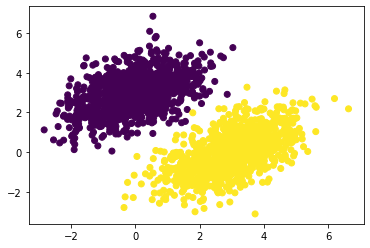

In [18]:
# 3-16 두 클래스의 포인트를 그래프로 그리기

import matplotlib.pyplot as plt

plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [19]:
# 3-17 선형 분류기의 변수 만들기
input_dim = 2 # 입력은 2D 포인트
output_dim = 1 # 출력 예측은 샘플당 하나의 점수(0에 가까우면 샘플을 클래스 0으로 예측하고, 1에 가까우면 클래스 1로 예측)
W = tf.Variable(initial_value = tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros(shape=(output_dim,)))

In [20]:
# 3-18 정방향 패스 함수
def model(inputs):
    return tf.matmul(inputs, W) + b

In [21]:
# 3-19 평균 제곱 오차 손실 함수

def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions) 
    # per_sample_losses는 targets나 predictions와 크기가 같은 텐서이며 각 샘플의 손실값을 담고있음
    return tf.reduce_mean(per_sample_losses) # 샘플당 손실값을 하나의 스칼라 손실값으로 평균함.

In [22]:
# 3-20 훈련 스텝 함수

learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions) # 그레이디언트 테이프 블록 안의 정방향 패스
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W,b]) # 가중치에 대한 손실의 기울기 구함
    W.assign_sub(grad_loss_wrt_W * learning_rate) # 가중치 업데이트
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [23]:
# 3-21 배치 훈련 루프

for step in range(40):
    loss = training_step(inputs, targets)
    print(f"{step}번째 스텝의 손실: {loss:.4f}")

0번째 스텝의 손실: 4.9781
1번째 스텝의 손실: 0.6904
2번째 스텝의 손실: 0.2193
3번째 스텝의 손실: 0.1567
4번째 스텝의 손실: 0.1397
5번째 스텝의 손실: 0.1285
6번째 스텝의 손실: 0.1189
7번째 스텝의 손실: 0.1102
8번째 스텝의 손실: 0.1023
9번째 스텝의 손실: 0.0951
10번째 스텝의 손실: 0.0886
11번째 스텝의 손실: 0.0827
12번째 스텝의 손실: 0.0774
13번째 스텝의 손실: 0.0725
14번째 스텝의 손실: 0.0681
15번째 스텝의 손실: 0.0641
16번째 스텝의 손실: 0.0604
17번째 스텝의 손실: 0.0571
18번째 스텝의 손실: 0.0541
19번째 스텝의 손실: 0.0514
20번째 스텝의 손실: 0.0489
21번째 스텝의 손실: 0.0467
22번째 스텝의 손실: 0.0446
23번째 스텝의 손실: 0.0428
24번째 스텝의 손실: 0.0411
25번째 스텝의 손실: 0.0396
26번째 스텝의 손실: 0.0382
27번째 스텝의 손실: 0.0369
28번째 스텝의 손실: 0.0358
29번째 스텝의 손실: 0.0348
30번째 스텝의 손실: 0.0338
31번째 스텝의 손실: 0.0330
32번째 스텝의 손실: 0.0322
33번째 스텝의 손실: 0.0315
34번째 스텝의 손실: 0.0309
35번째 스텝의 손실: 0.0303
36번째 스텝의 손실: 0.0297
37번째 스텝의 손실: 0.0293
38번째 스텝의 손실: 0.0288
39번째 스텝의 손실: 0.0284


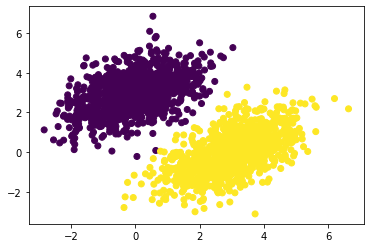

In [24]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0]>0.5)
plt.show() # 훈련 타깃과 매우 유사하다

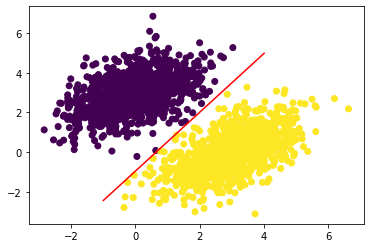

In [25]:
x = np.linspace(-1, 4, 100) # 직선을 그리기 위해 -1~4 사이에 일정한 간격을 가진 100개의 숫자 생성
y = -W[0] / W[1] * x + (0.5 - b) / W[1] # 사용할 직선의 방정식
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0]>0.5)
plt.show()

# 3.6 신경망의 구조: 핵심 Keras API 이해하기
## 3.6.1 층: 딥러닝의 구성 요소

층은 하나 이상의 텐서를 입력으로 받고 하나 이상의 텐서를 출력하는 데이터 처리 모듈이다.
대부분의 경우 가중치라는 층의 상태를 가진다. 가중치는 확률적 경사하강법으로 학습되는 하나 이상의 텐서이며 여기에 신경망이 학습한 지식이 담겨있다.
랭크-2 텐서에 저장된 간단한 벡터 데이터는 밀집 연결층으로 처리하는 경우가 많다(Dense).
이를 완전 연결층 또는 밀집층이라고도 부른다.
랭크-3 텐서에 저장된 시퀀스 데이터는 일반적으로 LSTM 같은 순환층이나 1D 합성곱층(Cond1D)로 처리한다.
랭크-4 텐서에 저장된 이미지 데이터는 보통 2D 합성곱 층(Conv2D)로 처리한다.

In [26]:
# 3-22 Layer의 서브클래스로 구현한 Dense 층

from tensorflow import keras

class SimpleDense(keras.layers.Layer): #모든 케라스 층은 Layer 클래스를 상속함
    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation
        
    def build(self, input_shape): # build() 메서드에서 가중치를 생성함
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                initializer="zeros")
        
    def call(self, inputs): # call() 메서드에서 정방향 패스 계산을 정의함
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

# 3.6.2 층에서 모델로

딥러닝 모델은 층으로 구성된 그래프이다.
케라스에서는 Model 클래스에 해당한다.
모델의 구조는 가성 공간을 정의한다.
네트워크 구조를 선택하면 가능성 있는 공간이 입력 데이터를 출력 데이터로 매핑하는 일련의 특정한 텐서 연산으로 제한된다.

# 3.6.3 '컴파일' 단계: 학습 과정 설정

모델 구조를 정의하고 난 후 다음 세 가지를 더 선택해야 한다.

1. 손실함수(목적함수): 훈련 과정에서 최소화할 값, 현재 작업에 대한 성공의 척도
2. 옵티마이저: 손실 함수를 기반으로 네트워크가 어떻게 업데이트될지 결정. 특정 종류의 확률적 경사하강법(SGD)로 구현됨.
3. 측정 지표: 훈련과 검증 과정에서 모니터링할 성공의 척도.

In [27]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
             loss="mean_squared_error",
             metrics=["accuracy"])

# 3.6.4 손실 함수 선택하기

2개의 클래스가 있는 분류 문제에는 이진 크로스엔트로피(binary crossentropy).
여러 개의 클래스가 있는 분류 문제에는 범주형 크로스엔트피(categorical crossentropy).
등등...

# 3.6.5 fit() 메서드 이해하기

주요 매개변수
1. 훈련할 데이터(입력과 타깃): 일반적으로 넘파이 배열이나 텐서플로 Dataset 객체로 전달.
2. 훈련할 Epoch 횟수: 전달한 데이터에서 훈련 루프를 몇 번이나 반복할지 알려줌.
3. 미니 배치 경사 하강법의 각 에폭에서 사용할 배치 크기: 가중치 업데이트 단계에서 기울기를 계산하는 데 사용될 훈련 샘플 개수

In [28]:
# 3-23 넘파이 데이터로 fit() 메서드 호출하기

history = model.fit(
    inputs, # 입력 샘플(넘파이 배열)
    targets, # 훈련 타깃(넘파이 배열)
    epochs = 5, # 이 데이터에서 훈련 루프를 다섯 번 반복함
    batch_size = 128) # 훈련 루프는 128개의 샘플 배치로 이 데이터를 순회함

Epoch 1/5
16/16 [==============================] - 0s 2ms/step - loss: 10.9373 - accuracy: 0.5610
Epoch 2/5
16/16 [==============================] - 0s 1ms/step - loss: 10.4258 - accuracy: 0.5620
Epoch 3/5
16/16 [==============================] - 0s 1ms/step - loss: 9.9923 - accuracy: 0.5635
Epoch 4/5
16/16 [==============================] - 0s 1ms/step - loss: 9.5793 - accuracy: 0.5640
Epoch 5/5
16/16 [==============================] - 0s 1ms/step - loss: 9.1800 - accuracy: 0.5650


# 3.6.6 검증 데이터에서 손실과 측정 지표 모니터링 하기

새로운 데이터에 모델이 어떻게 동작하는지 예상하기 위해 훈련 데이터의 일부를 검증 데이터로 떼어 놓는 것이 표준적인 방법.
검증 데이터에서 모델을 훈련하지 않지만 이 데이터를 사용하여 손실과 측정 지표를 계산.

In [29]:
model = keras. Sequential ([keras. layers. Dense(1)])
model. compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
    loss=keras.losses.MeanSquaredError(), 
    metrics=[keras.metrics.BinaryAccuracy ()])

indices_permutation = np.random.permutation (len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]
# 검증 데이터에 한 클래스의 샘플만 포함되는 것을 막기 위해 랜덤하게 생성한 인덱스를 사용해서 입력과 타깃을 섞음

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
# 훈련 입력과 타깃의 30%를 검증용으로 떼어놓음(검증 손실과 측정 지표 계산을 위해 훈련 데이터에서 이 샘플을 제외시켜 따로 보관)

model.fit(training_inputs, 
        training_targets, # 훈련 데이터는 모델의 가중치를 업데이트 하는데 사용
        epochs=5,
        batch_size=16,
        validation_data=(val_inputs, val_targets) # 검증 데이터는 검증 손실과 측정 지표를 모니터링 하는데만 사용
)

Epoch 1/5
88/88 [==============================] - 1s 3ms/step - loss: 0.1059 - binary_accuracy: 0.9543 - val_loss: 0.0278 - val_binary_accuracy: 0.9983
Epoch 2/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0762 - binary_accuracy: 0.9507 - val_loss: 0.0331 - val_binary_accuracy: 0.9933
Epoch 3/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0695 - binary_accuracy: 0.9621 - val_loss: 0.0402 - val_binary_accuracy: 0.9983
Epoch 4/5
88/88 [==============================] - 0s 2ms/step - loss: 0.0712 - binary_accuracy: 0.9607 - val_loss: 0.0452 - val_binary_accuracy: 0.9917
Epoch 5/5
88/88 [==============================] - 0s 1ms/step - loss: 0.0742 - binary_accuracy: 0.9571 - val_loss: 0.1967 - val_binary_accuracy: 0.8917
